In [ ]:
!pip install pycaret

     |████████████████████████████████| 288 kB 30.6 MB/s 
     |████████████████████████████████| 167 kB 54.8 MB/s 
     |████████████████████████████████| 261 kB 48.3 MB/s 
     |████████████████████████████████| 113 kB 44.5 MB/s 
     |████████████████████████████████| 1.3 MB 47.0 MB/s 
     |████████████████████████████████| 2.0 MB 24.2 MB/s 
     |████████████████████████████████| 15.5 MB 33.7 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 86 kB 6.5 MB/s 
     |████████████████████████████████| 6.8 MB 28.1 MB/s 
     |████████████████████████████████| 1.7 MB 45.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 596 kB 48.2 MB/s 
     |████████████████████████████████| 102 kB 11.2 MB/s 
     |████████████████████████████████| 3.1 MB 38.9 MB/s 
     |████████████████

In [ ]:
from pycaret.regression import *

In [ ]:
from google.colab import drive 
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
import pandas as pd
data=pd.read_csv('MyDrive/wind turbin/TexasTurbine.csv')
data.head(20)

Time stamp  System power generated | (kW)  Wind speed | (m/s)  \
0   Jan 1, 12:00 am                       1766.640               9.926   
1   Jan 1, 01:00 am                       1433.830               9.273   
2   Jan 1, 02:00 am                       1167.230               8.660   
3   Jan 1, 03:00 am                       1524.590               9.461   
4   Jan 1, 04:00 am                       1384.280               9.184   
5   Jan 1, 05:00 am                       1293.930               8.996   
6   Jan 1, 06:00 am                       1301.630               9.016   
7   Jan 1, 07:00 am                       1308.130               9.036   
8   Jan 1, 08:00 am                        792.081               7.612   
9   Jan 1, 09:00 am                        399.537               6.129   
10  Jan 1, 10:00 am                        362.988               5.961   
11  Jan 1, 11:00 am                        951.359               8.117   
12  Jan 1, 12:00 pm                       1549.750               9.540   
13  Jan 1, 01:00 pm                       1835.220              10.094   
14  Jan 1, 02:00 pm                       1208.370               8.789   
15  Jan 1, 03:00 pm                        686.154               7.286   
16  Jan 1, 04:00 pm                        624.105               7.088   
17  Jan 1, 05:00 pm                        678.936               7.266   
18  Jan 1, 06:00 pm                       1187.510               8.739   
19  Jan 1, 07:00 pm                       1881.720              10.212   

    Wind direction | (deg)  Pressure | (atm)  Air temperature | ('C)  
0                      128          1.000480                  18.263  
1                      135          0.999790                  18.363  
2                      142          0.999592                  18.663  
3                      148          0.998309                  18.763  
4                      150          0.998507                  18.963  
5                      149          0.998507                  19.063  
6                      151          0.998211                  19.113  
7                      154          0.997815                  19.163  
8                      154          1.000280                  19.363  
9                      162          1.002950                  19.963  
10                     152          1.000480                  20.763  
11                     141          1.000680                  21.063  
12                     141          0.996926                  21.063  
13                     136          1.000280                  20.763  
14                     137          0.998801                  20.663  
15                     126          0.999986                  20.663  
16                     122          0.999591                  20.563  
17                     121          0.997715                  20.363  
18                     116          0.996334                  20.363  
19                     126          0.994952                  20.363

In [ ]:
data.info

<bound method DataFrame.info of             Time stamp  System power generated | (kW)  Wind speed | (m/s)  \
0      Jan 1, 12:00 am                        1766.64               9.926   
1      Jan 1, 01:00 am                        1433.83               9.273   
2      Jan 1, 02:00 am                        1167.23               8.660   
3      Jan 1, 03:00 am                        1524.59               9.461   
4      Jan 1, 04:00 am                        1384.28               9.184   
...                ...                            ...                 ...   
8755  Dec 31, 07:00 pm                        1234.70               8.848   
8756  Dec 31, 08:00 pm                        1105.37               8.502   
8757  Dec 31, 09:00 pm                        1405.71               9.224   
8758  Dec 31, 10:00 pm                        1221.36               8.799   
8759  Dec 31, 11:00 pm                        1676.77               9.748   

      Wind direction | (deg)  Pressure | (a

In [ ]:
data=data.drop(['Time stamp'],axis=1)

In [ ]:
data

System power generated | (kW)  Wind speed | (m/s)  \
0                           1766.64               9.926   
1                           1433.83               9.273   
2                           1167.23               8.660   
3                           1524.59               9.461   
4                           1384.28               9.184   
...                             ...                 ...   
8755                        1234.70               8.848   
8756                        1105.37               8.502   
8757                        1405.71               9.224   
8758                        1221.36               8.799   
8759                        1676.77               9.748   

      Wind direction | (deg)  Pressure | (atm)  Air temperature | ('C)  
0                        128          1.000480                  18.263  
1                        135          0.999790                  18.363  
2                        142          0.999592                  18.663  
3                        148          0.998309                  18.763  
4                        150          0.998507                  18.963  
...                      ...               ...                     ...  
8755                     129          0.998604                  19.663  
8756                     118          1.000090                  19.063  
8757                     117          0.998408                  18.463  
8758                     116          0.998013                  18.063  
8759                     121          1.000380                  18.163  

[8760 rows x 5 columns]

In [ ]:
import numpy as np
from sklearn import preprocessing
import pandas as pd


data_array = np.array(data)
y_data = data_array[:,0]
x_data = data_array[:,1:]

for i in range(len(x_data)):
  x_data[i,1] = np.cos((x_data[i,1] * 2 * np.pi) / 360)

scaler = preprocessing.StandardScaler().fit(x_data)
x_data = scaler.transform(x_data)


d = {'System power generated | (kW)': y_data, 'Wind speed | (m/s)': x_data[:,0], 'Wind direction | (deg)': x_data[:,1], 'Pressure | (atm)': x_data[:,2], 'Air temperature | (C)': x_data[:,3]}

data = pd.DataFrame(d)

In [ ]:
clf=setup(data,target='System power generated | (kW)',train_size=.8,rare_level_threshold=0.3, outliers_threshold=0.08)

Description                          Value
0                               session_id                           4921
1                                   Target  System power generated | (kW)
2                            Original Data                      (8760, 5)
3                           Missing Values                          False
4                         Numeric Features                              4
5                     Categorical Features                              0
6                         Ordinal Features                          False
7                High Cardinality Features                          False
8                  High Cardinality Method                           None
9                    Transformed Train Set                      (7008, 4)
10                    Transformed Test Set                      (1752, 4)
11                      Shuffle Train-Test                           True
12                     Stratify Train-Test                          False
13                          Fold Generator                          KFold
14                             Fold Number                             10
15                                CPU Jobs                             -1
16                                 Use GPU                          False
17                          Log Experiment                          False
18                         Experiment Name               reg-default-name
19                                     USI                           a4ce
20                         Imputation Type                         simple
21          Iterative Imputation Iteration                           None
22                         Numeric Imputer                           mean
23      Iterative Imputation Numeric Model                           None
24                     Categorical Imputer                       constant
25  Iterative Imputation Categorical Model                           None
26           Unknown Categoricals Handling                 least_frequent
27                               Normalize                          False
28                        Normalize Method                           None
29                          Transformation                          False
30                   Transformation Method                           None
31                                     PCA                          False
32                              PCA Method                           None
33                          PCA Components                           None
34                     Ignore Low Variance                          False
35                     Combine Rare Levels                          False
36                    Rare Level Threshold                           None
37                         Numeric Binning                          False
38                         Remove Outliers                          False
39                      Outliers Threshold                           None
40                Remove Multicollinearity                          False
41             Multicollinearity Threshold                           None
42             Remove Perfect Collinearity                           True
43                              Clustering                          False
44                    Clustering Iteration                           None
45                     Polynomial Features                          False
46                       Polynomial Degree                           None
47                    Trignometry Features                          False
48                    Polynomial Threshold                           None
49                          Group Features                          False
50                       Feature Selection                          False
51                Feature Selection Method                        classic
52            Features Selection Threshold                           None
53                     Feature Inte

In [ ]:
best=compare_models()

Model       MAE          MSE      RMSE  \
rf                Random Forest Regressor    2.9471      30.2136    5.4741   
et                  Extra Trees Regressor    1.9866      14.4169    3.7782   
lightgbm  Light Gradient Boosting Machine    3.6384      27.0821    5.2010   
gbr           Gradient Boosting Regressor    5.4459      56.7715    7.5285   
dt                Decision Tree Regressor    5.3248      79.4890    8.9026   
ada                    AdaBoost Regressor   38.7496    2383.7080   48.7686   
knn                 K Neighbors Regressor   49.2621    6061.8015   77.6389   
ridge                    Ridge Regression  219.1073   67998.3523  260.5874   
br                         Bayesian Ridge  219.0958   67998.4179  260.5874   
lar                Least Angle Regression  219.0886   67998.4382  260.5873   
lasso                    Lasso Regression  219.3280   68003.3840  260.5979   
lr                      Linear Regression  219.0886   67998.4387  260.5873   
omp           Orthogonal Matching Pursuit  221.9619   69151.3494  262.7830   
huber                     Huber Regressor  208.1037   74213.8354  272.0983   
llar         Lasso Least Angle Regression  237.9439   75443.3818  274.5770   
par          Passive Aggressive Regressor  207.0858   82588.1070  286.7773   
en                            Elastic Net  318.7610  146252.0984  382.3625   
dummy                     Dummy Regressor  737.9414  768863.2188  876.7809   

              R2   RMSLE     MAPE  TT (Sec)  
rf        1.0000  0.0311   0.0141     1.627  
et        1.0000  0.0252   0.0142     1.068  
lightgbm  1.0000  0.0797   0.0260     0.148  
gbr       0.9999  0.2180   0.0336     0.499  
dt        0.9999  0.0375   0.0206     0.037  
ada       0.9969  1.4536   1.6644     0.362  
knn       0.9921  0.5192   1.1054     0.071  
ridge     0.9115  1.9496   3.4756     0.017  
br        0.9115  1.9496   3.4771     0.017  
lar       0.9115  1.9497   3.4781     0.017  
lasso     0.9115  1.9485   3.4409     0.016  
lr        0.9115  1.9497   3.4781     0.335  
omp       0.9100  1.9545   3.5677     0.015  
huber     0.9034  2.0683   5.8342     0.030  
llar      0.9018  1.8245   1.7432     0.018  
par       0.8926  2.1149   6.7672     0.020  
en        0.8097  1.5880   3.5379     0.017  
dummy    -0.0004  2.4411  18.4238     0.015

In [ ]:
top5=compare_models(n_select=5)

Model       MAE          MSE      RMSE  \
rf                Random Forest Regressor    2.9471      30.2136    5.4741   
et                  Extra Trees Regressor    1.9866      14.4169    3.7782   
lightgbm  Light Gradient Boosting Machine    3.6384      27.0821    5.2010   
gbr           Gradient Boosting Regressor    5.4459      56.7715    7.5285   
dt                Decision Tree Regressor    5.3248      79.4890    8.9026   
ada                    AdaBoost Regressor   38.7496    2383.7080   48.7686   
knn                 K Neighbors Regressor   49.2621    6061.8015   77.6389   
ridge                    Ridge Regression  219.1073   67998.3523  260.5874   
br                         Bayesian Ridge  219.0958   67998.4179  260.5874   
lar                Least Angle Regression  219.0886   67998.4382  260.5873   
lasso                    Lasso Regression  219.3280   68003.3840  260.5979   
lr                      Linear Regression  219.0886   67998.4387  260.5873   
omp           Orthogonal Matching Pursuit  221.9619   69151.3494  262.7830   
huber                     Huber Regressor  208.1037   74213.8354  272.0983   
llar         Lasso Least Angle Regression  237.9439   75443.3818  274.5770   
par          Passive Aggressive Regressor  207.0858   82588.1070  286.7773   
en                            Elastic Net  318.7610  146252.0984  382.3625   
dummy                     Dummy Regressor  737.9414  768863.2188  876.7809   

              R2   RMSLE     MAPE  TT (Sec)  
rf        1.0000  0.0311   0.0141     1.627  
et        1.0000  0.0252   0.0142     1.021  
lightgbm  1.0000  0.0797   0.0260     0.105  
gbr       0.9999  0.2180   0.0336     0.494  
dt        0.9999  0.0375   0.0206     0.036  
ada       0.9969  1.4536   1.6644     0.350  
knn       0.9921  0.5192   1.1054     0.067  
ridge     0.9115  1.9496   3.4756     0.017  
br        0.9115  1.9496   3.4771     0.016  
lar       0.9115  1.9497   3.4781     0.019  
lasso     0.9115  1.9485   3.4409     0.017  
lr        0.9115  1.9497   3.4781     0.017  
omp       0.9100  1.9545   3.5677     0.016  
huber     0.9034  2.0683   5.8342     0.030  
llar      0.9018  1.8245   1.7432     0.015  
par       0.8926  2.1149   6.7672     0.019  
en        0.8097  1.5880   3.5379     0.018  
dummy    -0.0004  2.4411  18.4238     0.011

In [ ]:
top5

[RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=4921, verbose=0, warm_start=False),
 ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=4921, verbose=0, warm_start=False),
 LGBMRe

In [ ]:
##Ensembling Model
rf=create_model('rf')
et=create_model('et')	
##bilding 7 models

blend=blend_models([et,rf,et,rf,et,rf,et])

MAE      MSE    RMSE   R2   RMSLE    MAPE
0     2.0780  14.2244  3.7715  1.0  0.0096  0.0038
1     2.3348  19.9977  4.4719  1.0  0.0145  0.0073
2     2.1194  16.7426  4.0918  1.0  0.0319  0.0087
3     2.4592  20.2028  4.4947  1.0  0.0159  0.0058
4     1.9896  14.2404  3.7737  1.0  0.0380  0.0072
5     2.2549  19.1658  4.3779  1.0  0.0346  0.0052
6     2.6310  27.2762  5.2227  1.0  0.0129  0.0048
7     2.4105  17.9673  4.2388  1.0  0.0313  0.0064
8     2.2208  19.2242  4.3845  1.0  0.0334  0.0845
9     2.1010  15.4022  3.9246  1.0  0.0323  0.0039
Mean  2.2599  18.4444  4.2752  1.0  0.0254  0.0138
SD    0.1893   3.6400  0.4087  0.0  0.0102  0.0236

In [ ]:
rf=create_model('rf')

MAE      MSE    RMSE      R2   RMSLE    MAPE
0     2.6983  22.6421  4.7584  1.0000  0.0125  0.0048
1     3.0898  31.7919  5.6384  1.0000  0.0189  0.0073
2     2.7017  24.6248  4.9623  1.0000  0.0327  0.0098
3     3.1194  32.1671  5.6716  1.0000  0.0172  0.0069
4     2.6734  26.4167  5.1397  1.0000  0.0575  0.0097
5     3.1298  35.5344  5.9611  1.0000  0.0387  0.0068
6     3.3483  43.3589  6.5847  0.9999  0.0170  0.0058
7     3.0458  28.5080  5.3393  1.0000  0.0395  0.0074
8     2.8350  28.5631  5.3444  1.0000  0.0439  0.0775
9     2.8302  28.5291  5.3413  1.0000  0.0334  0.0050
Mean  2.9471  30.2136  5.4741  1.0000  0.0311  0.0141
SD    0.2185   5.6468  0.4975  0.0000  0.0137  0.0212

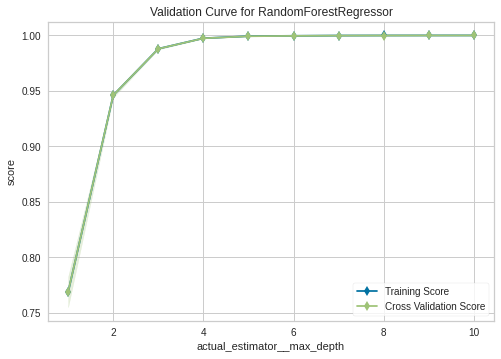

In [ ]:
evaluate_model(rf)

In [ ]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
et=create_model('et')

MAE      MSE    RMSE   R2   RMSLE    MAPE
0     1.8589  11.6238  3.4094  1.0  0.0103  0.0032
1     2.0195  15.5691  3.9458  1.0  0.0151  0.0077
2     1.9624  14.4577  3.8023  1.0  0.0391  0.0101
3     2.1721  16.6706  4.0830  1.0  0.0156  0.0055
4     1.7509  10.8728  3.2974  1.0  0.0280  0.0061
5     1.8533  13.1199  3.6221  1.0  0.0330  0.0053
6     2.3368  20.7105  4.5509  1.0  0.0117  0.0044
7     2.1425  14.2782  3.7787  1.0  0.0298  0.0064
8     1.9776  16.1381  4.0172  1.0  0.0354  0.0901
9     1.7922  10.7287  3.2755  1.0  0.0338  0.0034
Mean  1.9866  14.4169  3.7782  1.0  0.0252  0.0142
SD    0.1762   2.9094  0.3768  0.0  0.0103  0.0254

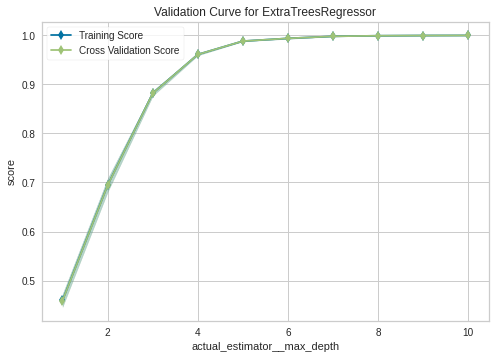

In [ ]:
evaluate_model(et)

In [ ]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

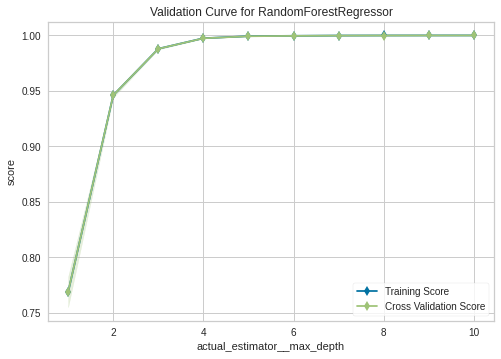

In [ ]:
evaluate_model(blend)

In [ ]:
evaluate_model(blend)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
evaluate_model(blend)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
evaluate_model(blend)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
evaluate_model(blend)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
evaluate_model(blend)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
from google.colab import drive 
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
import pandas as pd
data=pd.read_csv('MyDrive/wind turbin/TexasTurbine.csv')
data.head(20)

Time stamp  ...  Air temperature | ('C)
0   Jan 1, 12:00 am  ...                  18.263
1   Jan 1, 01:00 am  ...                  18.363
2   Jan 1, 02:00 am  ...                  18.663
3   Jan 1, 03:00 am  ...                  18.763
4   Jan 1, 04:00 am  ...                  18.963
5   Jan 1, 05:00 am  ...                  19.063
6   Jan 1, 06:00 am  ...                  19.113
7   Jan 1, 07:00 am  ...                  19.163
8   Jan 1, 08:00 am  ...                  19.363
9   Jan 1, 09:00 am  ...                  19.963
10  Jan 1, 10:00 am  ...                  20.763
11  Jan 1, 11:00 am  ...                  21.063
12  Jan 1, 12:00 pm  ...                  21.063
13  Jan 1, 01:00 pm  ...                  20.763
14  Jan 1, 02:00 pm  ...                  20.663
15  Jan 1, 03:00 pm  ...                  20.663
16  Jan 1, 04:00 pm  ...                  20.563
17  Jan 1, 05:00 pm  ...                  20.363
18  Jan 1, 06:00 pm  ...                  20.363
19  Jan 1, 07:00 pm  ...                  20.363

[20 rows x 6 columns]

In [ ]:
data=data.drop(['Time stamp'],axis=1)
data

System power generated | (kW)  ...  Air temperature | ('C)
0                           1766.64  ...                  18.263
1                           1433.83  ...                  18.363
2                           1167.23  ...                  18.663
3                           1524.59  ...                  18.763
4                           1384.28  ...                  18.963
...                             ...  ...                     ...
8755                        1234.70  ...                  19.663
8756                        1105.37  ...                  19.063
8757                        1405.71  ...                  18.463
8758                        1221.36  ...                  18.063
8759                        1676.77  ...                  18.163

[8760 rows x 5 columns]

In [ ]:
import numpy as np
from sklearn import preprocessing


data_array = np.array(data)
y_data = data_array[:,0]
x_data = data_array[:,1:]

for i in range(len(x_data)):
  x_data[i,1] = np.sin((x_data[i,1] * 2 * np.pi) / 360)

scaler = preprocessing.StandardScaler().fit(x_data)
x_data = scaler.transform(x_data)


len_train = int(0.8 * (len(y_data)))

x_train = x_data[0:len_train,:]
y_train = y_data[0:len_train]

x_test = x_data[len_train:]
y_test = y_data[len_train:]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout


import tensorflow as tf

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.2)
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

lstm = Sequential()
lstm.add(LSTM(units = 350, return_sequences = True, input_shape = (x_train.shape[1] , 1)))
lstm.add(LSTM(units = 250, return_sequences = True,))
lstm.add(LSTM(units = 150))
lstm.add(Flatten())
lstm.add(Dense(units = 50))
lstm.add(Dense(units = 10))
lstm.add(Dense(units = 1))
lstm.summary()
lstm.compile(optimizer=opt, loss = 'mean_squared_error')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 4, 350)            492800    
                                                                 
 lstm_4 (LSTM)               (None, 4, 250)            601000    
                                                                 
 lstm_5 (LSTM)               (None, 150)               240600    
                                                                 
 flatten_1 (Flatten)         (None, 150)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                7550      
                                                                 
 dense_4 (Dense)             (None, 10)                510       
                                                                 
 dense_5 (Dense)             (None, 1)                

Epoch 1/200
165/165 [==============================] - 11s 15ms/step - loss: 1188663.1250
Epoch 2/200
165/165 [==============================] - 3s 15ms/step - loss: 113945.0859
Epoch 3/200
165/165 [==============================] - 3s 15ms/step - loss: 10118.1650
Epoch 4/200
165/165 [==============================] - 2s 15ms/step - loss: 4008.5278
Epoch 5/200
165/165 [==============================] - 3s 15ms/step - loss: 2070.2439
Epoch 6/200
165/165 [==============================] - 3s 15ms/step - loss: 1299.8724
Epoch 7/200
165/165 [==============================] - 3s 15ms/step - loss: 1083.3586
Epoch 8/200
165/165 [==============================] - 3s 15ms/step - loss: 832.2941
Epoch 9/200
165/165 [==============================] - 3s 15ms/step - loss: 1043.9762
Epoch 10/200
165/165 [==============================] - 3s 15ms/step - loss: 506.2473
Epoch 11/200
165/165 [==============================] - 3s 15ms/step - loss: 782.0814
Epoch 12/200
165/165 [==========================

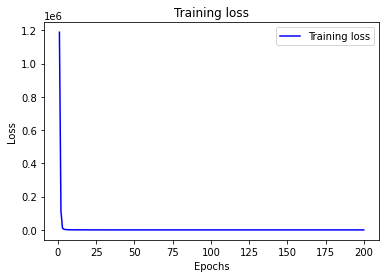

55/55 [==============================] - 2s 6ms/step - loss: 13.4854
MSE test = 13.485371589660645


In [ ]:
history_fit = lstm.fit(x_train,y_train, epochs=200, batch_size=32)


# lost by epochs


import matplotlib.pyplot as plt


loss = history_fit.history['loss']
epochs = range(1, len(loss) + 1)


plt.plot(epochs, loss, 'b', label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training loss')

plt.legend()
plt.show()


history_evaluate = lstm.evaluate(x_test,y_test, batch_size=32)
print('MSE test = {}'.format(history_evaluate))

Epoch 1/200
219/219 [==============================] - 8s 16ms/step - loss: 860461.6875
Epoch 2/200
219/219 [==============================] - 3s 16ms/step - loss: 19028.7715
Epoch 3/200
219/219 [==============================] - 3s 16ms/step - loss: 769.6105
Epoch 4/200
219/219 [==============================] - 3s 16ms/step - loss: 358.9020
Epoch 5/200
219/219 [==============================] - 3s 16ms/step - loss: 333.6836
Epoch 6/200
219/219 [==============================] - 3s 16ms/step - loss: 271.4924
Epoch 7/200
219/219 [==============================] - 3s 16ms/step - loss: 155.8790
Epoch 8/200
219/219 [==============================] - 3s 16ms/step - loss: 123.5837
Epoch 9/200
219/219 [==============================] - 3s 16ms/step - loss: 93.1010
Epoch 10/200
219/219 [==============================] - 3s 16ms/step - loss: 93.3777
Epoch 11/200
219/219 [==============================] - 3s 16ms/step - loss: 119.1416
Epoch 12/200
219/219 [==============================] - 3s 1

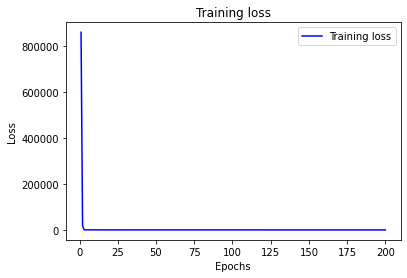

55/55 [==============================] - 2s 5ms/step - loss: 7.9526
MSE test = 7.952584266662598


In [ ]:
history_fit = lstm.fit(x_train,y_train, epochs=200, batch_size=32)


# lost by epochs


import matplotlib.pyplot as plt


loss = history_fit.history['loss']
epochs = range(1, len(loss) + 1)


plt.plot(epochs, loss, 'b', label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training loss')

plt.legend()
plt.show()


history_evaluate = lstm.evaluate(x_test,y_test, batch_size=32)
print('MSE test = {}'.format(history_evaluate))

In [ ]:
y_pred = lstm.predict(x_test)

for i in range(len(y_pred)):
  print('y test = {}  and  y pred = {}'.format(y_test[i],y_pred[i]))

y test = 1732.11  and  y pred = [1732.2006]
y test = 1617.67  and  y pred = [1618.7367]
y test = 1722.05  and  y pred = [1722.4077]
y test = 1661.26  and  y pred = [1661.6384]
y test = 1831.65  and  y pred = [1828.8015]
y test = 1884.06  and  y pred = [1884.3007]
y test = 1662.68  and  y pred = [1663.9078]
y test = 1433.14  and  y pred = [1432.2567]
y test = 1622.88  and  y pred = [1623.8491]
y test = 1151.48  and  y pred = [1151.2977]
y test = 1124.16  and  y pred = [1124.8394]
y test = 764.5989999999999  and  y pred = [763.7003]
y test = 607.335  and  y pred = [614.23065]
y test = 341.601  and  y pred = [343.56702]
y test = 197.959  and  y pred = [202.84966]
y test = 261.046  and  y pred = [260.558]
y test = 372.356  and  y pred = [377.87103]
y test = 400.776  and  y pred = [403.89908]
y test = 667.685  and  y pred = [670.5718]
y test = 1021.22  and  y pred = [1024.1715]
y test = 938.059  and  y pred = [943.6292]
y test = 272.283  and  y pred = [271.70325]
y test = 981.197  and  y pr